In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
inp0= pd.read_csv("nonfin_listed_icr_banker_npa.csv")

In [3]:
inp0.shape

(3316, 10)

In [4]:
inp0.describe()

,co_code,month,year
count,3316.000000,3316.000000,3316.0
mean,166198.507539,3.075995,2016.0
std,114260.586837,0.789992,0.0
min,11.000000,3.000000,2016.0
25%,78549.000000,3.000000,2016.0
50%,151870.500000,3.000000,2016.0
75%,235773.000000,3.000000,2016.0
max,535080.000000,12.000000,2016.0


In [5]:
inp0.head(5)

,co_code,co_name,fy_date,month,year,icr_category,bank_name,bank_type,gnpar,nnpar
0,11,20 MICRONS LTD.,31mar2016,3,2016,MED,STATE BANK OF INDIA,SBI & Associates,NPAR_HI,NPAR_LO
1,289,A B C INDIA LTD.,31mar2016,3,2016,LOW,STATE BANK OF INDIA,SBI & Associates,NPAR_HI,NPAR_LO
2,363,STARLOG ENTERPRISES LTD.,31mar2016,3,2016,LOW,AXIS BANK LTD.,Private,NPAR_LO,NPAR_LO
3,365,A B G SHIPYARD LTD.,31mar2016,3,2016,LOW,ANDHRA BANK,Public,NPAR_HI,NPAR_HI
4,400,A B L BIOTECHNOLOGIES LTD.,31mar2016,3,2016,NaN,I C I C I BANK LTD.,Private,NPAR_LO,NPAR_LO


In [6]:
inp0.isnull().sum()

co_code           0
co_name           0
fy_date           0
month             0
year              0
icr_category    700
bank_name       571
bank_type       755
gnpar           755
nnpar           755
dtype: int64

In [7]:
percent_inp0= round(100*(inp0.isnull().sum()/len(inp0.index)), 2)
percent_inp0

co_code          0.00
co_name          0.00
fy_date          0.00
month            0.00
year             0.00
icr_category    21.11
bank_name       17.22
bank_type       22.77
gnpar           22.77
nnpar           22.77
dtype: float64

In [8]:
inp0["icr_category"].describe()

count     2616
unique       3
top       HIGH
freq      1432
Name: icr_category, dtype: object

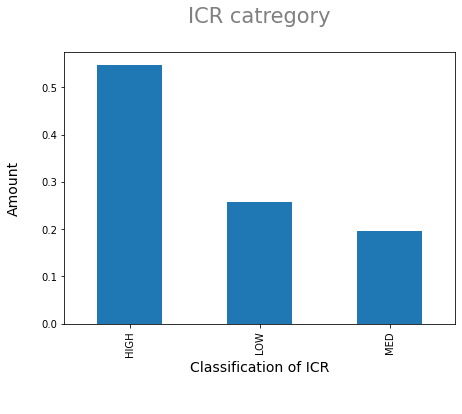

In [9]:
plt.figure(figsize=[7,5])

plt.title("ICR catregory\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification of ICR\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.icr_category.value_counts(normalize=True).plot.bar()
plt.show()

###
We can see from the above univariate analysis that ICR is around 55% is for category "HIGH" (highest) whereas lowest for "MED"

In [10]:
inp1= pd.read_csv("market_returns.csv")

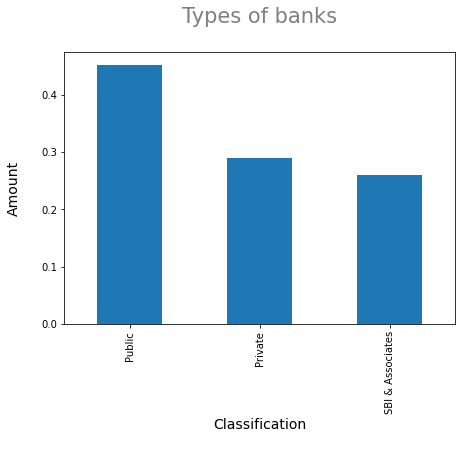

In [11]:
plt.figure(figsize=[7,5])

plt.title("Types of banks\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.bank_type.value_counts(normalize=True).plot.bar()
plt.show()


We can see that public type banks are the most lenders for non-financial firms.

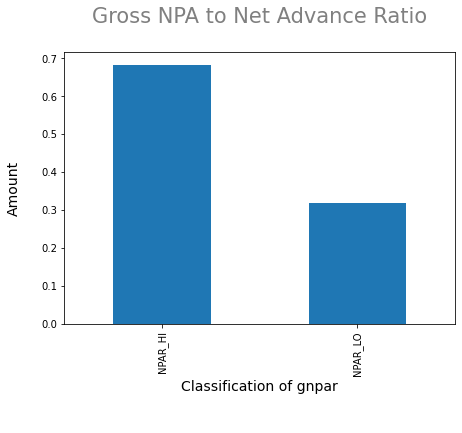

In [12]:
plt.figure(figsize=[7,5])

plt.title("Gross NPA to Net Advance Ratio\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification of gnpar\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.gnpar.value_counts(normalize=True).plot.bar()
plt.show()


From above we can see that NPAR_HI has higher frequency over the year 2016, which implies that bank's asset quality is in very poor shape.

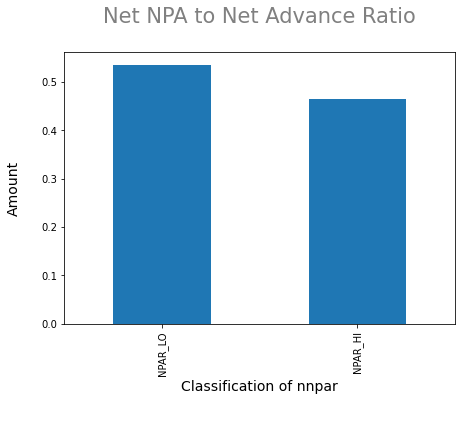

In [13]:
plt.figure(figsize=[7,5])

plt.title("Net NPA to Net Advance Ratio\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification of nnpar\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.nnpar.value_counts(normalize=True).plot.bar()
plt.show()


Net NPA indicate deduction of inpaid loans from unpaid obligations, resulting sum relates to net non-performing assets.
Here higher frequency is for NPAR_LO wich implies overall there is less allowance for poor and uncertain debts than the amount of non-performing loans.

## Bivariate Analysis

In [14]:
# NPAR_HI represent value 1 and NPAR_LO represent value 0
inp0["gnpar"]=np.where(inp0.gnpar=="NPAR_HI",1,0)
inp0.gnpar.value_counts(normalize=True)

1    0.52684
0    0.47316
Name: gnpar, dtype: float64

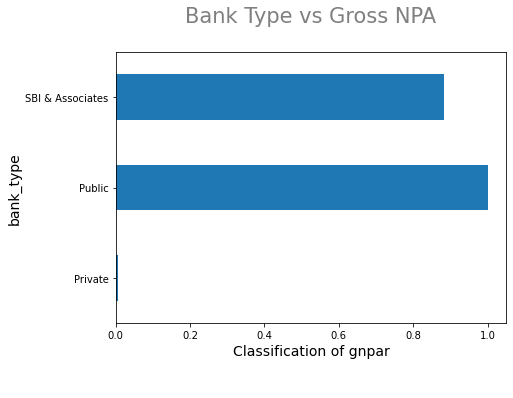

In [15]:
plt.figure(figsize=[7,5])

plt.title("Bank Type vs Gross NPA\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification of gnpar\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.groupby("bank_type")["gnpar"].mean().plot.barh()


Public banks turn out to be highest lenders for NPA

In [16]:
inp0["nnpar"]=np.where(inp0.nnpar=="NPAR_HI",1,0)
inp0.nnpar.value_counts(normalize=True)

0    0.640531
1    0.359469
Name: nnpar, dtype: float64

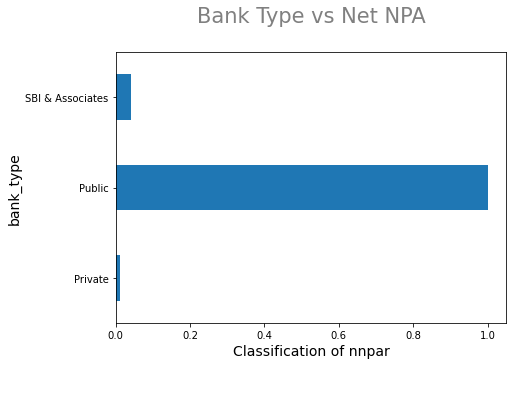

In [17]:
plt.figure(figsize=[7,5])

plt.title("Bank Type vs Net NPA\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Classification of nnpar\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.groupby("bank_type")["nnpar"].mean().plot.barh()


We find similar evidence as in the case of Gross NPA. Public banks are not good at identifying good borrowers.

In [18]:
level_map = {'HIGH':2,'MEDIUM':1,'LOW':0}
inp0['icr_category'] = inp0['icr_category'].map(level_map)

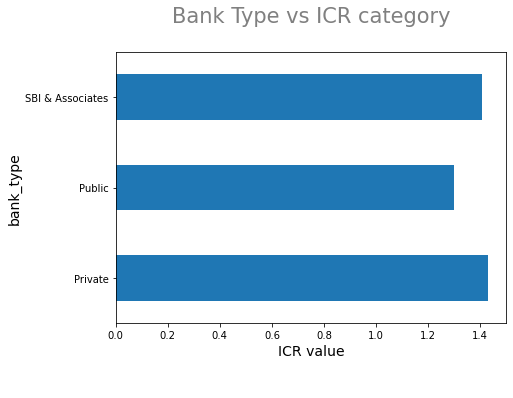

In [19]:
plt.figure(figsize=[7,5])

plt.title("Bank Type vs ICR category\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('ICR value\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
inp0.groupby("bank_type")["icr_category"].mean().plot.barh()

we can see that public,private and SBI & Associates banks have medium category ICR ,that is, 1<=ICR<=2 (MED).

## Market return for MAY 2017

In [20]:
data = pd.read_csv("market_returns.csv", index_col ="date")

In [21]:
may_17= rows = data.loc["02may2017":"26may2017"] 

In [22]:
may_17.mkt_return.mean()

0.16625188830603937

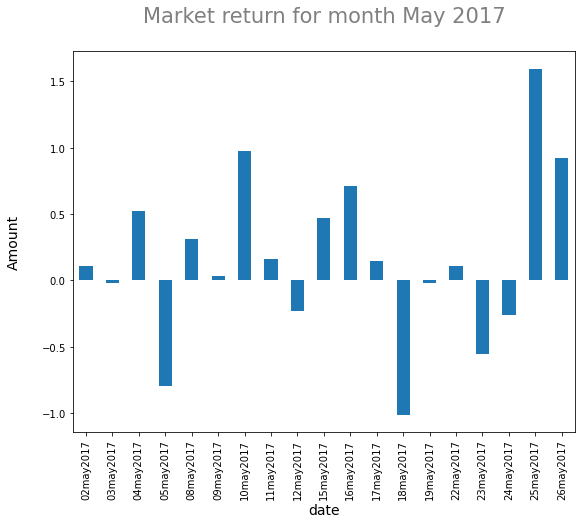

In [23]:
plt.figure(figsize=[9,7])
plt.title("Market return for month May 2017\n", fontdict={'fontsize':21,'fontweight':6,'color':'Grey'})
plt.xlabel('Date\n\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
plt.ylabel('Amount\n',fontdict={'fontsize':14,'color':'black','fontweight':5})
may_17.mkt_return.plot.bar()

Analysis of market return based on May 2017. 
Market return for the whole May month. We can see the fluctuation from point 0. Overall impact of market return is postive with mean value 16% 

## Stressed vs Non-Stressed banks

In [36]:
# Take median on Gross NPA
inp0.gnpar.median()

1.0

(array([   0.,    0.,    0.,    0.,    0., 1747.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

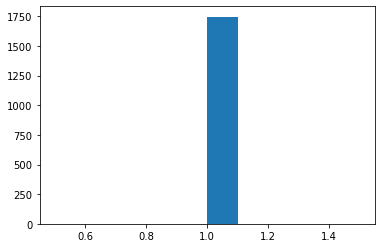

In [39]:
# Extract banks above median Gross NPA
inp3=inp0[inp0.gnpar>=1.0]
plt.hist(inp3.gnpar)

In [28]:
# Firms linked to stressed banks
inp3.co_name.value_counts()

GITANJALI GEMS LTD.                  1
KIRLOSKAR PNEUMATIC CO. LTD.         1
BAJAJ STEEL INDS. LTD.               1
NATIONAL STEEL & AGRO INDS. LTD.     1
SAKTHI SUGARS LTD.                   1
                                    ..
ALOK INDUSTRIES LTD.                 1
J K CEMENT LTD.                      1
ANSAL HOUSING & CONSTRUCTION LTD.    1
EMPOWER INDIA LTD.                   1
SHRI KESHAV CEMENTS & INFRA LTD.     1
Name: co_name, Length: 1192, dtype: int64

(array([   0.,    0.,    0.,    0.,    0., 1569.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

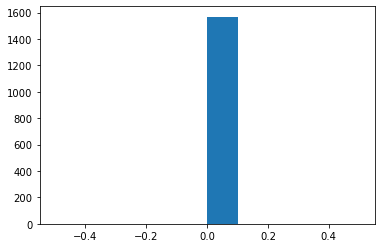

In [41]:
# Extract banks below median Net NPA
inp4=inp0[inp0.gnpar<1.0]
plt.hist(inp4.gnpar)

In [31]:
# Firms linked to non-stressed banks
inp4.co_name.value_counts()

ANANT RAJ LTD.                     1
BIOCON LTD.                        1
RAJASTHAN PETRO SYNTHETICS LTD.    1
THIRU AROORAN SUGARS LTD.          1
UNITECH INTERNATIONAL LTD.         1
                                  ..
GALLANTT ISPAT LTD.                1
INDRAYANI BIOTECH LTD.             1
I I T L PROJECTS LTD.              1
PREMIER POLYFILM LTD.              1
ACCEL TRANSMATIC LTD.              1
Name: co_name, Length: 2124, dtype: int64

Above segregation of banks on the basis of median Gross GPA represent Stressed and Non-stressed banks and firms linked to it.

## Import data file for ret_banks and merge 

In [59]:
data1 = pd.read_csv("ret_banks_2016-2017.csv")

In [60]:
data1

,co_code,co_name,date,stk_return
0,100224,INDUSIND BANK LTD.,01jan2016,-0.529999
1,100224,INDUSIND BANK LTD.,04jan2016,-3.079998
2,100224,INDUSIND BANK LTD.,05jan2016,0.109994
3,100224,INDUSIND BANK LTD.,06jan2016,0.929999
4,100224,INDUSIND BANK LTD.,07jan2016,-1.950002
...,...,...,...,...
11119,98918,INDIAN OVERSEAS BANK,27mar2017,-1.679999
11120,98918,INDIAN OVERSEAS BANK,28mar2017,0.569999
11121,98918,INDIAN OVERSEAS BANK,29mar2017,0.000000
11122,98918,INDIAN OVERSEAS BANK,30mar2017,-0.190002


In [57]:
data2= pd.read_csv("ret_banks_2016-2017_part2.csv")

In [58]:
data2

,co_code,date,stk_return
0,11019,03apr2017,0.00
1,11019,05apr2017,1.70
2,11019,06apr2017,-1.47
3,11019,07apr2017,-1.70
4,11019,10apr2017,2.14
...,...,...,...
2011,512651,16jun2017,-1.04
2012,512651,19jun2017,-0.17
2013,512651,20jun2017,0.09
2014,512651,21jun2017,-0.17


In [63]:
data4= pd.merge(data1, data2, on='co_code')

In [64]:
data4

,co_code,co_name,date_x,stk_return_x,date_y,stk_return_y
0,100224,INDUSIND BANK LTD.,01jan2016,-0.529999,03apr2017,-1.52
1,100224,INDUSIND BANK LTD.,01jan2016,-0.529999,05apr2017,-0.18
2,100224,INDUSIND BANK LTD.,01jan2016,-0.529999,06apr2017,1.48
3,100224,INDUSIND BANK LTD.,01jan2016,-0.529999,07apr2017,-0.66
4,100224,INDUSIND BANK LTD.,01jan2016,-0.529999,10apr2017,0.93
...,...,...,...,...,...,...
622939,98918,INDIAN OVERSEAS BANK,31mar2017,0.950003,16jun2017,1.71
622940,98918,INDIAN OVERSEAS BANK,31mar2017,0.950003,19jun2017,-3.00
622941,98918,INDIAN OVERSEAS BANK,31mar2017,0.950003,20jun2017,-0.97
622942,98918,INDIAN OVERSEAS BANK,31mar2017,0.950003,21jun2017,-0.19


In [65]:
data_corr=data4.corr(method='spearman')

In [66]:
data_corr

,co_code,stk_return_x,stk_return_y
co_code,1.000000,-0.001635,-0.006615
stk_return_x,-0.001635,1.000000,0.002969
stk_return_y,-0.006615,0.002969,1.000000


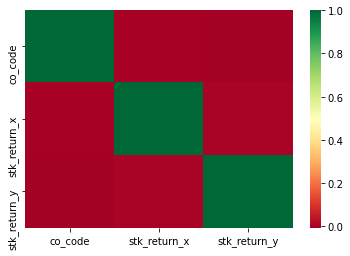

In [67]:
sns.heatmap(data_corr, cmap="RdYlGn",annot=False)

Stk_return for total year has very less correlation with each other

In [69]:
alloc_1= pd.read_csv("ret_allcos_2016-2017.csv")

In [72]:
alloc_2=pd.read_csv("ret_allcos_2016-2017_part2.csv")

In [73]:
alloc_3= pd.merge(alloc_1, alloc_2, on='co_code')

In [74]:
alloc_3

,co_code,co_name,date_x,stk_return_x,date_y,stk_return_y
0,100044,INDUCTO STEEL LTD.,01jan2016,0.349998,06apr2017,0.00
1,100044,INDUCTO STEEL LTD.,01jan2016,0.349998,08jun2017,-1.89
2,100044,INDUCTO STEEL LTD.,01jan2016,0.349998,16may2017,4.41
3,100044,INDUCTO STEEL LTD.,01jan2016,0.349998,21jun2017,NaN
4,100044,INDUCTO STEEL LTD.,01jan2016,0.349998,26may2017,NaN
...,...,...,...,...,...,...
35761595,99971,INDSIL HYDRO POWER & MANGANESE LTD.,31mar2017,1.719999,05jun2017,-1.57
35761596,99971,INDSIL HYDRO POWER & MANGANESE LTD.,31mar2017,1.719999,28apr2017,-1.64
35761597,99971,INDSIL HYDRO POWER & MANGANESE LTD.,31mar2017,1.719999,02may2017,-0.50
35761598,99971,INDSIL HYDRO POWER & MANGANESE LTD.,31mar2017,1.719999,11may2017,4.94


In [75]:
alloc_corr=alloc_3.corr(method='spearman')

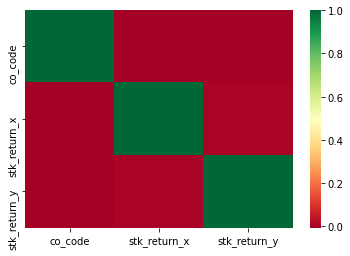

In [76]:
sns.heatmap(alloc_corr, cmap="RdYlGn",annot=False)

Very less correlation between any company stk_retrun